# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [275]:
import numpy as np
class LinearRegression():
    
    def __init__(self, iterations, learning_rate):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X_train, y_train):
        self.weights = np.zeros(X_train[0].shape)
        self.bias = 0
        m = len(y_train)
        self.costs = []
        for _ in range(self.iterations):
            y_pred = X_train.dot(self.weights) + self.bias
            # Loss in weights = XT(Xw +b - y)
            dw = (X_train.T.dot(y_pred - y_train))/m
            self.weights -= self.learning_rate*dw
            # append the cost in each iteration
            self.costs.append(np.sum(np.square(y_pred - y_train)))
            # Loss in bias in batch GD = sum of (yhat - y) for each training example
            db = (np.sum(y_pred - y_train))/m
            self.bias -= self.learning_rate*db
    def predict(self, X_test):
        n = len(X_test)
        predictions = []
        for idx in range(n):
            yhat = self.weights.dot(X_test[idx]) + self.bias
            predictions.append(yhat)
        return predictions
    def cost(self):
        return self.costs
            
        

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [276]:
import os
import pandas as pd
os.chdir(os.path.expanduser('~/Downloads'))
realestate = pd.read_csv('Real estate.csv')
realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

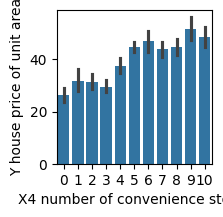

In [278]:
plt.figure(figsize=(2, 2))
sns.barplot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', data=realestate)

In [279]:
realestate.isnull().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

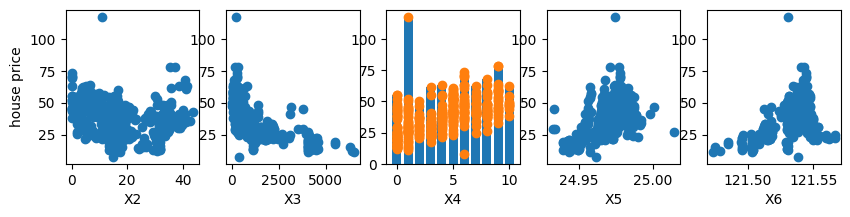

In [280]:
columns = ['X2 house age',	'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 
           'X6 longitude']
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
yplot = 'Y house price of unit area'
axs[0].set_ylabel('house price')
for i, feature in enumerate(columns):
    if feature == 'X4 number of convenience stores':
        axs[i].bar(realestate[feature], realestate[yplot])
    axs[i].set_xlabel(f'X{i+2}')
    axs[i].scatter(x=realestate[feature], y=realestate[yplot])

    

In [281]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

X = np.array(realestate.drop(columns=['No', 'X1 transaction date']))
y = np.array(realestate['Y house price of unit area'])

minmaxscalerX = MinMaxScaler()
standardscalery = Normalizer()

X = minmaxscalerX.fit_transform(X)
y = standardscalery.fit_transform(y.reshape(1, -1))[0]

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [283]:
lgr = LinearRegression(iterations=10000, learning_rate=0.01)
lgr.fit(X_train, y_train)

In [284]:
y_predicted = lgr.predict(X_test)

In [285]:
from sklearn.metrics import mean_squared_error


Text(0, 0.002, 'cost = 0.008388613588750666')

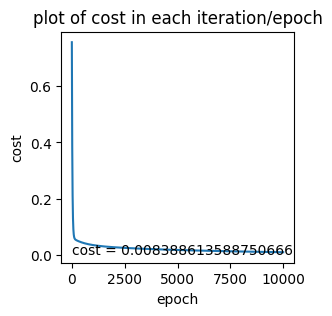

In [286]:
cost = lgr.cost()
epochs = np.arange(lgr.iterations)
plt.figure(figsize=(3, 3))
plt.plot(epochs, cost)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('plot of cost in each iteration/epoch')
# Cost at last epoch .
plt.text(0, 0.0020, f'cost = {cost[-1]}')

In [287]:
# Sklearn Model Linear regression
from sklearn.linear_model import LinearRegression

lnrrgr = LinearRegression(n_jobs=-1)
lnrrgr.fit(X_train, y_train)
y_predicted_sk = lnrrgr.predict(X_test)
print(f'Accuracy based on scratch model : {mean_squared_error(y_predicted, y_test)}'); 
print(f'based on Sckit learn Linear regression {mean_squared_error(y_test, y_predicted_sk)}'); 

Accuracy based on scratch model : 2.2259114195413127e-05
based on Sckit learn Linear regression 1.755703894765389e-33


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [248]:
from sklearn import datasets

data  = datasets.load_breast_cancer()
Xl = data['data'] ; yl = data['target']
minmaxscalerXl = MinMaxScaler()
Xl = minmaxscalerXl.fit_transform(Xl)

Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl)


5. Write code for the sigmoid function and Logistic regression.


In [249]:
def sigmoid(z):
  g_z = 1/(1 + np.exp(-z))
  return g_z

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = X.dot(self.weights) + (self.bias)
            y_pred = sigmoid(z)
            dw = (X.T.dot(y_pred - y)/n_samples)
            db = (np.sum(y_pred - y))/n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        z = X.dot(self.weights) + self.bias
        y_pred = sigmoid(z)
          
          
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [250]:
logreg = LogisticRegression(epochs=500, learning_rate=0.01)
logreg.fit(Xl_train, yl_train)
yl_predict = logreg.predict(Xl_test)

In [251]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(Xl_train, yl_train)
yl_predict_sk = logit.predict(Xl_test)

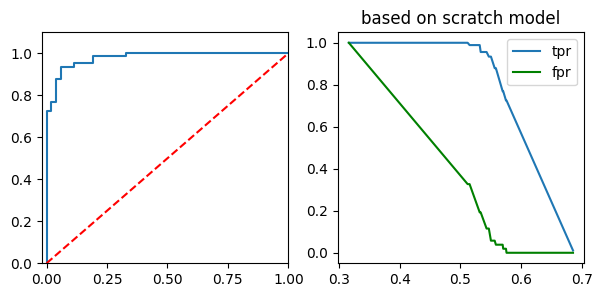

In [253]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(yl_test, yl_predict)
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
plt.title('based on scratch model')
axs[0].plot(fpr, tpr)
axs[0].set_xlim(-0.02, 1.0)
axs[0].set_ylim(0, 1.1)
axs[0].plot([0, 1], [0, 1], 'r--')
axs[1].plot(thresholds, tpr, label='tpr')
axs[1].plot(thresholds, fpr, 'g', label='fpr')
axs[1].legend()
# Best threshold is 0.52


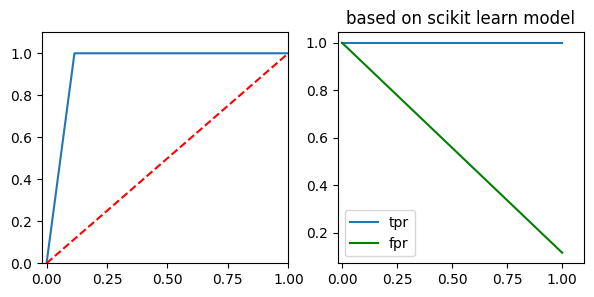

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(yl_test, yl_predict_sk)
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
plt.title('based on scikit learn model')
axs[0].plot(fpr, tpr)
axs[0].set_xlim(-0.02, 1.0)
axs[0].set_ylim(0, 1.1)
axs[0].plot([0, 1], [0, 1], 'r--')
axs[1].plot(thresholds, tpr, label='tpr')
axs[1].plot(thresholds, fpr, 'g', label='fpr')
axs[1].set_xlim(-0.02, 1.1)
axs[1].legend()
# Best threshold is 0.9

9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [260]:
yl_predicted = []
yl_predicted_sk = []
for p_1, p_2 in zip(yl_predict, yl_predict_sk):
    if p_1 >= 0.55 :
        yl_predicted.append(1)
    else: 
        yl_predicted.append(0)
    if p_2 >= 0.95:
        yl_predicted_sk.append(1)
    else : 
        yl_predicted_sk.append(0)
    

In [261]:
from sklearn.metrics import classification_report
print(classification_report(yl_test, yl_predicted))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.97      0.93      0.95        91

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [262]:
print(classification_report(yl_test, yl_predicted_sk))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        52
           1       0.94      1.00      0.97        91

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



Text(0.5, 1.0, 'based on scratch model')

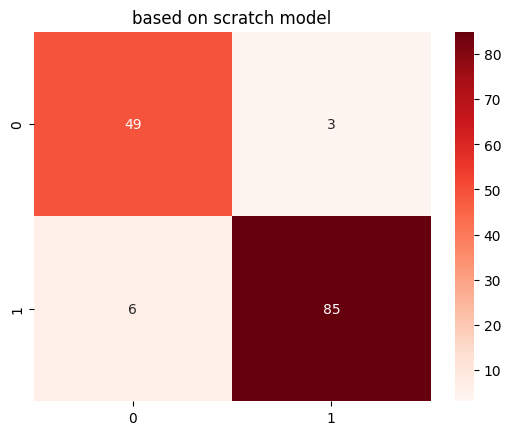

In [263]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true=yl_test, y_pred=yl_predicted), annot=True, cmap='Reds')
plt.title('based on scratch model')


Text(0.5, 1.0, 'based on scikit learn model')

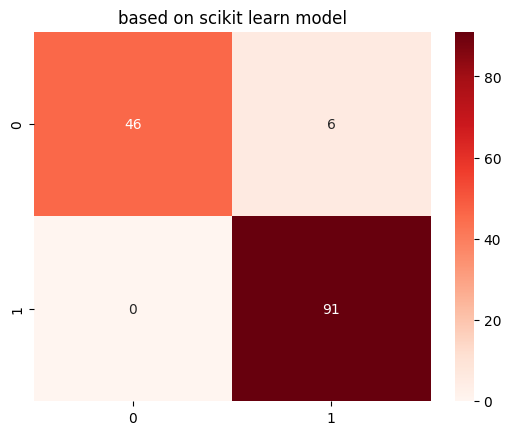

In [264]:
sns.heatmap(confusion_matrix(y_true=yl_test, y_pred=yl_predicted_sk), annot=True, cmap='Reds')
plt.title('based on scikit learn model')


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [288]:
glassdf = pd.read_csv('glass.csv.xls')
glassdf.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [218]:
Xk = np.array(glassdf.drop(columns=['RI', 'Type']))
yk = np.array(glassdf.Type)
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.01)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [219]:
def Euclidean_distance(X, y):
    dis = np.square(X - y)
    dis = np.sum(dis, axis=1)
    return dis

class KNN():
    def __init__(self, k) :
        # k nearest neighbours are considered.
        self.k = k
    def train(self, X, y):
        self.X = X
        self.y = y
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            dis = Euclidean_distance(self.X , x)
            dis = np.array(dis)
            arg_dis = np.argsort(dis)[:self.k]
            # argdis = []
            # for idx in arg_dis:
            #     argdis.append(self.y[idx])
            # hash = {i : 0 for i in argdis}
            # for class_ in argdis:
            #     hash[class_]+=1
            # for idx, (key, value) in enumerate(hash.items()):
            #     if idx == 0:
            #         maxkey = key
            #         maxvalue = value
            #     else:
            #         if value > maxvalue :
            #             maxvalue = value
            #             maxkey = key
            # predictions.append(maxkey)
            nearest_labels = self.y[arg_dis]
            
            counts = np.bincount(nearest_labels)
            prediction = np.argmax(counts)
            
            predictions.append(prediction)
        
        return predictions
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

In [220]:
knn = KNN(k=3)
knn.train(Xk_train, yk_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [221]:
yk_predict = knn.predict(Xk_test)

In [222]:
# from sklearn.metrics import accuracy_score
accuracy(yk_test, yk_predict)

1.0

In [223]:
knn2 = KNN(k=5)
knn2.train(Xk_train, yk_train)
yk2_predict = knn2.predict(Xk_test)
accuracy(yk_test, yk2_predict)

1.0

In [224]:
knn3 = KNN(k=7)
knn3.train(Xk_train, yk_train)
yk3_predict = knn3.predict(Xk_test)
accuracy(yk_test, yk3_predict)

1.0

In [225]:
knn4 = KNN(k=9)
knn4.train(Xk_train, yk_train)
yk4_predict = knn4.predict(Xk_test)
accuracy(yk_test, yk4_predict)

0.6666666666666666